In [1]:
import tensorflow as tf


##FASHION MNIST

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(xtrain,ytrain),(xval,yval)=fashion_mnist.load_data()
xtrain.shape,ytrain.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [4]:
xval.shape,yval.shape

((10000, 28, 28), (10000,))

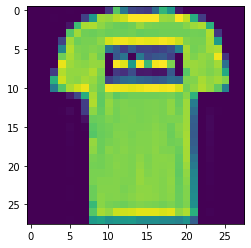

0


In [8]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1])
plt.show()
print(ytrain[1])

In [10]:
#creating model using sequential API
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(300,activation='relu',),
                                    tf.keras.layers.Dense(100,activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax')


])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               235500    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
    
)

In [18]:
history = model.fit(xtrain,ytrain,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4525 - accuracy: 0.8415
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4194 - accuracy: 0.8522
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4039 - accuracy: 0.8576
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3858 - accuracy: 0.8628
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3667 - accuracy: 0.8710
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3584 - accuracy: 0.8745
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3477 - accuracy: 0.8769
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3445 - accuracy: 0.8797
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3342 - accuracy: 0.8824
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss

In [19]:
history.history

{'accuracy': [0.8415166735649109,
  0.8522499799728394,
  0.8576333522796631,
  0.8628333210945129,
  0.870983362197876,
  0.8744500279426575,
  0.8769333362579346,
  0.8796666860580444,
  0.8823666572570801,
  0.8847500085830688],
 'loss': [0.4524635076522827,
  0.4193991422653198,
  0.4038967490196228,
  0.38582301139831543,
  0.36665064096450806,
  0.3584088087081909,
  0.34765997529029846,
  0.34453997015953064,
  0.3342345952987671,
  0.325726717710495]}

In [20]:
model.predict(xval)

array([[1.0334621e-19, 6.9594091e-20, 1.8782188e-24, ..., 8.9997709e-02,
        6.0970969e-08, 8.9487326e-01],
       [2.6737385e-07, 7.4977008e-10, 9.9971658e-01, ..., 0.0000000e+00,
        1.6242131e-09, 0.0000000e+00],
       [1.1349994e-14, 9.9999893e-01, 1.8426246e-20, ..., 0.0000000e+00,
        1.2785706e-13, 7.1283346e-34],
       ...,
       [2.9630752e-02, 7.8524616e-14, 1.6329086e-05, ..., 1.5907502e-12,
        9.7035170e-01, 1.6492795e-12],
       [2.1785336e-15, 9.9942017e-01, 8.7657511e-23, ..., 0.0000000e+00,
        3.6827917e-18, 4.6985152e-34],
       [3.5896819e-02, 2.4598818e-02, 6.1297584e-02, ..., 2.2592522e-01,
        8.6570628e-02, 5.2480359e-02]], dtype=float32)

##Model Creation from Gradient Descent Scratch

In [21]:
#for same model if I'm Calculating gradient and doing stuff how it feels
optimiser = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()


In [23]:
#prepare dataset
batch_size=32
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain,ytrain))
train_dataset = train_dataset.shuffle(buffer_size = 1024).batch(batch_size)

In [ ]:
for i in range(0,2):
  for x,y in train_dataset:
    with tf.GradientTape() as g:
        y_pred = model(x)
        los = loss(y,y_pred)
    grads = g.gradient(los,model.trainable_weights)
    optimiser.apply_gradients(zip(grads,model.trainable_weights))   
    print(grads,model.trainable_weights)


Streaming output truncated to the last 5000 lines.
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.14576807e-02, -2.13148609e-01,  2.00042397e-01,
         1.27388828e-03,  2.87947449e-04,  0.00000000e+00,
         8.66147966e-05,  0.00000000e+00,  1.33530769e-08,
         5.45323934e-29],
       [ 1.38805808e-26,  0.00000000e+00,  0.00000000e+00,
         3.52668172e-11,  2.58244307e-31,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
       [-2.15932146e-01, -1.95886195e-01,  8.67742151e-02,
        -3.08585986e-02, -1.58967197e-01,  1.25916794e-01,
         1.23721823e-01,  4.73326966e-02, -1.13563344e-01,
         5.73349707e-02],
       [ 1.50740400e-01, -8.58496130e-02,  2.28083525e-02,
        -2.26590142e-01,  1.15897447e-01,  3.43356542e-02,
         1.33429185e-01, -3.09418533e-02,  1.54587671e-01,
         1.09545991e-01],
       [-2.36449748e-01, -2.85287261e-01,  1.02317622e-02,
         7.34456927e-02, -2.52402842e-01,  1.54578194e-01,
         4.79532667e-02, -6.46877438e-02,  1.21477693e-01,
        -4.20979708e-02],
       [ 1.69931725e-01, -6.23798296e-02, -2.35910341e-01,
        -9.77375507e-02, -2.23219648e-01, -5.70771173e-02,
        -4.26265523e-02, -1.93512127e-01,  1.24261573e-01,
         8.74587223e-02],
       [ 5.35179153e-02,  8.21125060e-02,  3.17910388e-02,
         3.76718082e-02,  4.42482755e-02, -2.14009151e-01,
         3.74460779

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 6.1825063e-02, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
       -2.0995314e-05,  0.0000000e+00, -1.6637823e-04, -3.0214925e-10,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
       -1.7173768e-06,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00, -5.2999280e-06, -1.0434509e-06,  0.0000000e+00,
        4.4049980e-06, -1.3666444e-08,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  5.2664814e-07,  0.0000000e+00, -7.3755577e-14,
        0.0000000e+00,  0.0000000e+00, -1.9763574e-08,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  6.0086353e-07,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00, -1.1350993e-04,  0.0000000e+00,
       -5.2253467e-06,  0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.19412977e-05, -6.95411654e-05,  2.58578381e-10,
         4.71313724e-05,  2.27279484e-09,  0.00000000e+00,
         1.59584457e-09,  0.00000000e+00,  1.48885217e-14,
         0.00000000e+00],
       [ 2.40909418e-25,  0.00000000e+00,  0.00000000e+00,
         7.52751404e-15,  3.08529867e-34,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
       [-2.15932146e-01, -1.95886195e-01,  8.67742151e-02,
        -3.08585986e-02, -1.58967197e-01,  1.25916794e-01,
         1.23721823e-01,  4.73326966e-02, -1.13563344e-01,
         5.73349707e-02],
       [ 1.50740400e-01, -8.58496130e-02,  2.28083525e-02,
        -2.26590142e-01,  1.15897447e-01,  3.43356542e-02,
         1.33429185e-01, -3.09418533e-02,  1.54587671e-01,
         1.09545991e-01],
       [-2.36449748e-01, -2.85287261e-01,  1.02317622e-02,
         7.34456927e-02, -2.52402842e-01,  1.54578194e-01,
         4.79532667e-02, -6.46877438e-02,  1.21477693e-01,
        -4.20979708e-02],
       [ 1.69931725e-01, -6.23798296e-02, -2.35910341e-01,
        -9.77375507e-02, -2.23219648e-01, -5.70771173e-02,
        -4.26265523e-02, -1.93512127e-01,  1.24261573e-01,
         8.74587223e-02],
       [ 5.31067885e-02,  8.58175606e-02,  3.40211093e-02,
         4.47490327e-02,  2.94695254e-02, -2.14615241e-01,
         2.52978951

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
       [-2.05981597e-01,  9.62992534e-02, -1.18825831e-01,
         7.86559954e-02, -8.50187764e-02,  9.07379836e-02,
        -1.23990834e-01,  6.80967420e-02,  3.13045122e-02,
         5.29356040e-02],
       [ 9.95238945e-02, -2.19301745e-01, -9.11211371e-02,
        -1.73825487e-01,  2.94738393e-02,  1.08117685e-01,
        -6.08587712e-02,  1.38851628e-01, -2.31714219e-01,
        -4.89114374e-02],
       [ 1.11233713e-02,  9.06618834e-02,  4.42636609e-02,
         7.07332045e-02, -7.80492723e-02,  7.36160055e-02,
        -3.25706184e-01, -4.60138395e-02, -2.20122635e-01,
         5.84783219e-03],
       [-1.61361754e-01,  2.69769561e-02, -1.55445069e-01,
        -1.35841474e-01, -1.87787428e-01, -1.09307870e-01,
        -2.00586870e-01,  1.24940291e-01, -1.49416387e-01,
         9.64520574e-02],
       [ 5.45261987e-03, -1.97871216e-02, -1.20753452e-01,
         1.70851782e-01, -7.50874057e-02,  3.80918686e-03,
        -1.93078369

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
       -4.9770038e-05,  0.0000000e+00, -1.8102932e-05,  4.0604109e-06,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
       -1.8957920e-07,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  2.8154156e-05,  0.0000000e+00,  0.0000000e+00,
        2.3008473e-05, -3.6032286e-09,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00, -2.5456682e-06,  0.0000000e+00,  1.2927220e-11,
        0.0000000e+00,  0.0000000e+00,  5.5030050e-08,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00, -7.4516727e-05,  0.0000000e+00,
       -2.8106402e-05,  0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.76994037e-02, -4.72440600e-01,  3.81575478e-03,
         4.15359229e-01,  2.85486802e-02,  7.63733117e-29,
         6.75403792e-03,  0.00000000e+00,  2.63524707e-04,
         1.65077513e-22],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.0000000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
         3.1942751e-03,  0.0000000e+00,  1.1026961e-02,  0.0000000e+00,
         6.7990550e-05,  1.8727372e-36],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
        -1.09357678e-03,  0.00000000e+00,  2.53916386e-18,
         0.00000000e+00],
       [ 4.12063003e-01,  2.72309815e-04,  8.48565483e-04,
        -3.57316208e+00,  9.16620716e-02,  2.60721536e-05,
         2.83302367e-02,  9.70827863e-11,  3.03995919e+00,
         3.43146761e-10],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.0000000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
       -5.25260754e-02, -3.71742137e-02,  1.56860843e-01,  2.92083681e-01,
       -9.59461778e-02,  4.24457230e-02, -1.38664052e-01,  1.67793587e-01,
       -3.79155912e-02,  3.42037901e-02, -1.68801263e-01, -2.39804648e-02,
        1.12341754e-02, -6.43632747e-03, -3.37888896e-02, -1.08885169e-02,
        3.05814724e-02, -2.26037600e-03, -2.36368194e-01,  1.06405728e-01,
        9.91141889e-03, -2.27875020e-02,  7.67141134e-02,  1.66851468e-02,
        1.62575558e-01, -1.01707196e-02, -2.34578550e-02, -3.28435563e-02,
       -2.52360497e-02,  9.96150151e-02, -3.79660889e-03, -1.87507756e-02,
        1.09175473e-01, -2.19294820e-02,  2.47196317e-01, -1.16973883e-02,
       -1.45316785e-02, -2.31944509e-02, -4.03655134e-02, -4.90578823e-02,
        1.15891267e-02,  5.81058502e-01,  3.54869634e-01,  1.01209702e-02,
        8.57700169e-01,  1.89266339e-01,  1.58160731e-01, -1.65329687e-02,
       -7.64443423e-04, -3.14672023e-01,  6.09320

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 2.4665467e-04, -1.9163338e-03,  5.9433414e-06,  1.1597093e-03,
         4.9551920e-04,  6.0197869e-34,  8.6318651e-06,  0.0000000e+00,
         5.1146888e-08,  1.8453517e-14],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
       [-2.05981597e-01,  9.62992534e-02, -1.18825831e-01,
         7.86559954e-02, -8.50187764e-02,  9.07379836e-02,
        -1.23990834e-01,  6.80967420e-02,  3.13045122e-02,
         5.29356040e-02],
       [ 9.95238945e-02, -2.19301745e-01, -9.11211371e-02,
        -1.73825487e-01,  2.94738393e-02,  1.08117685e-01,
        -6.08587712e-02,  1.38851628e-01, -2.31714219e-01,
        -4.89114374e-02],
       [ 1.11233713e-02,  9.06618834e-02,  4.42636609e-02,
         7.07332045e-02, -7.80492723e-02,  7.36160055e-02,
        -3.25706184e-01, -4.60138395e-02, -2.20122635e-01,
         5.84783219e-03],
       [-1.61361754e-01,  2.69769561e-02, -1.55445069e-01,
        -1.35841474e-01, -1.87787428e-01, -1.09307870e-01,
        -2.00586870e-01,  1.24940291e-01, -1.49416387e-01,
         9.64520574e-02],
       [ 5.45261987e-03, -1.97871216e-02, -1.20753452e-01,
         1.70851782e-01, -7.50874057e-02,  3.80918686e-03,
        -1.93078369

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
       -5.25260754e-02, -3.71742137e-02,  1.72605172e-01,  2.84236550e-01,
       -9.59461778e-02,  3.77400815e-02, -1.40432820e-01,  1.67793587e-01,
       -2.78102420e-02,  3.42037901e-02, -1.66977093e-01, -2.36500725e-02,
        1.12341754e-02, -6.43632747e-03, -3.21078710e-02, -1.08885169e-02,
        3.32761407e-02, -2.26037600e-03, -2.39595234e-01,  1.21692374e-01,
        9.91141889e-03, -2.27875020e-02,  7.81270638e-02,  1.67009719e-02,
        1.67298093e-01, -1.01707196e-02, -1.53659554e-02, -3.28435563e-02,
       -2.52360497e-02,  1.04293481e-01, -3.79660889e-03, -1.87507756e-02,
        1.17602378e-01, -2.19294820e-02,  2.44920850e-01, -1.16973883e-02,
       -1.45316785e-02, -2.31944509e-02, -4.03655134e-02, -4.90578823e-02,
        1.15891267e-02,  5.73553145e-01,  3.53037655e-01,  1.01209702e-02,
        8.62862468e-01,  1.89128920e-01,  1.66752681e-01, -1.65329687e-02,
       -7.64443423e-04, -3.23319405e-01,  6.10168